# Algunas visualizaciones

In [ ]:
import requests
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

Carga de datos

In [66]:
full_data = pd.read_csv("data/full_data.csv")
full_data

,station_id,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,last_reported,is_charging_station,status,is_installed,is_renting,is_returning,traffic,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,Date,hora,dia
0,420,3,1,8,0,1.745880e+09,False,IN_SERVICE,1,1,1,NaN,3,0,2025-04-28,23:28:05,Monday
1,464,11,2,7,0,1.745894e+09,False,IN_SERVICE,1,1,1,NaN,11,0,2025-04-28,23:28:05,Monday
2,420,5,1,6,1,1.745897e+09,False,IN_SERVICE,1,1,1,NaN,5,0,2025-04-29,00:32:59,Tuesday
3,464,11,2,7,0,1.745898e+09,False,IN_SERVICE,1,1,1,NaN,11,0,2025-04-29,00:32:59,Tuesday
4,420,5,1,6,1,1.745900e+09,False,IN_SERVICE,1,1,1,NaN,5,0,2025-04-29,01:13:46,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12401,464,4,1,15,0,1.770144e+09,False,IN_SERVICE,1,1,1,NaN,4,0,2026-02-03,15:43:41,Tuesday
12402,420,0,3,9,0,1.770148e+09,False,IN_SERVICE,1,1,1,NaN,0,0,2026-02-03,16:39:16,Tuesday
12403,464,1,1,18,0,1.770147e+09,False,IN_SERVICE,1,1,1,NaN,1,0,2026-02-03,16:39:16,Tuesday
12404,420,1,3,8,0,1.770150e+09,False,IN_SERVICE,1,1,1,NaN,1,0,2026-02-03,17:26:41,Tuesday


Genero valores promedio, minimos y máximos de disponibilidad de bicis.

In [75]:
data_by_hour = full_data.groupby(["Date", "dia", "hora"], as_index=False).agg(
    suma_bicis_disponibles = ('num_bikes_available', 'sum')
)
data_by_hour


data_by_date = data_by_hour.groupby(["Date", "dia"], as_index=False).agg(
    promedio_bicis_disponibles = ('suma_bicis_disponibles', 'mean'),
    max_bicis_disponibles = ('suma_bicis_disponibles', 'max'),
    min_bicis_disponibles = ('suma_bicis_disponibles', 'min')
)
data_by_date


data_by_day = data_by_date.groupby(["dia"], as_index=False).agg(
    promedio_bicis_disponibles = ('promedio_bicis_disponibles', 'mean'),
    promedio_max_bicis_disponibles = ('max_bicis_disponibles', 'mean'),
    promedio_min_bicis_disponibles = ('min_bicis_disponibles', 'mean')
)


# Define the order
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert to categorical type
data_by_day['dia'] = pd.Categorical(data_by_day['dia'], categories=custom_order, ordered=True)

# Now sort_values() will follow your list, not the alphabet
data_by_day = data_by_day.sort_values(by='dia')

data_by_day

,dia,promedio_bicis_disponibles,promedio_max_bicis_disponibles,promedio_min_bicis_disponibles
1,Monday,10.774401,17.000000,6.292683
5,Tuesday,9.622174,14.463415,4.560976
6,Wednesday,8.432863,14.275000,3.850000
4,Thursday,9.092361,15.050000,4.800000
0,Friday,9.476856,14.100000,6.200000
2,Saturday,8.295807,10.850000,6.125000
3,Sunday,8.645272,11.075000,6.750000


Visualizo estos valores. Creo que permite ver algo de cuando es más o menos riesgoso ir a buscar bici y no encontrar.

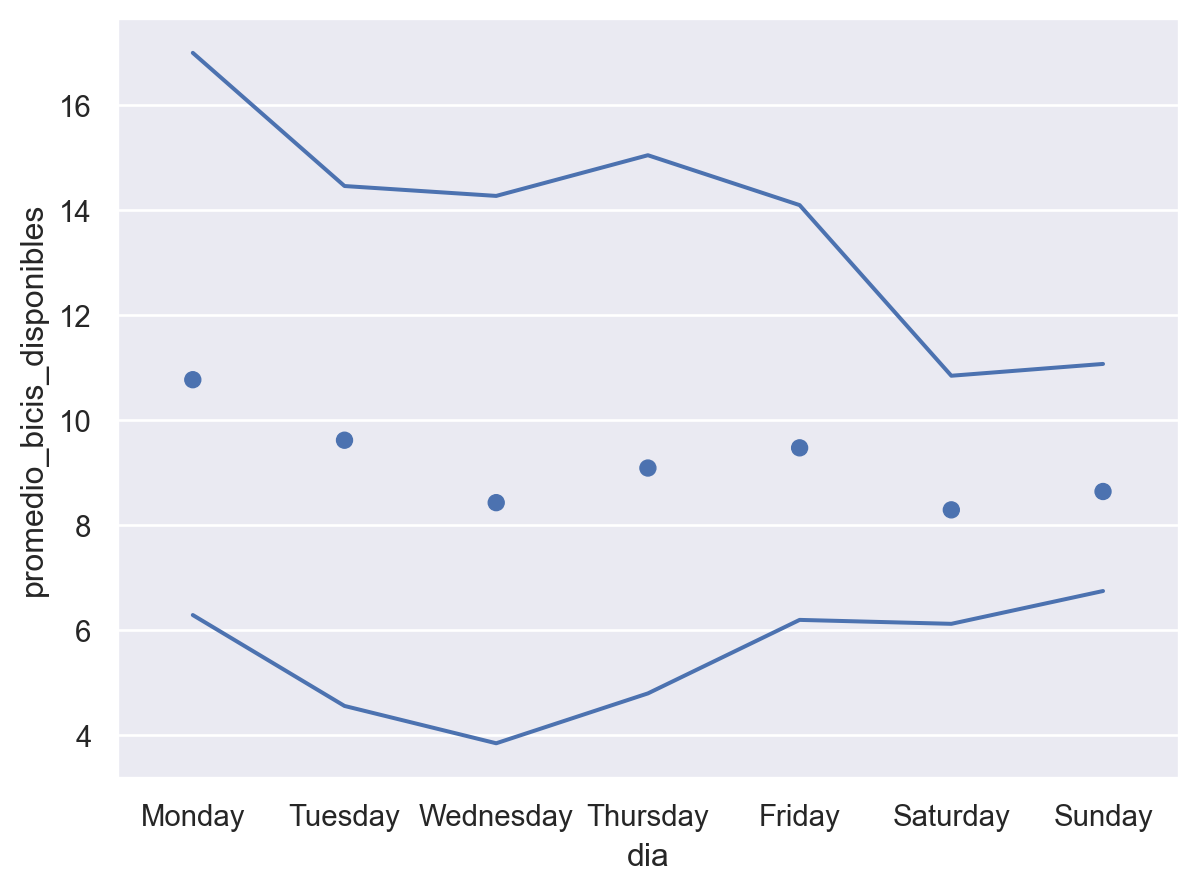

In [84]:
(
    so.Plot(data = data_by_day, x = "dia", y = "promedio_bicis_disponibles")
    .add(so.Dot())
    .add(so.Line(), y = "promedio_min_bicis_disponibles")
    .add(so.Line(), y = "promedio_max_bicis_disponibles")
)